# 1. Imports

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


sns.set(color_codes=True)
%matplotlib inline
# from matplotlib.pyplot import pie, axis, show

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# 2. Préparation des données

### 2.1 Analyse et tri des colonnes 

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**PassengerId** : ID unique du passager *drop*

**Survived** : État de vie du passager *On prend*

**Pclass** : Classe du ticket > 1 = 1ère classe / 2 = 2ème classe / 3 = 3ème classe *On prend*

**Name** : Nom du passager > a noter que le nom du passager varie en fonction de son sexe *string, drop*

**Sex** : Genre du passager > 0 = F / 1 = M *On prend*

**Age** : Age du passager *On prend*

**SibSp** : Nombre de frères/soeurs/conjoints à bord du Titanic *On prend*

**Parch** : Nombre de parents/enfants à bord *On prend*

**Ticket** : Numero de ticket du passager *drop*

**Fare** : Tarif par passager *On prend*

**Cabin** : Numero de cabine des passagers *drop*

**Embarked** : Port d'embarquement > C = Chebourg / Q = Queenstown / S = Southampton *On prend*

### 2.2 Analyse et tri des types et des valeurs nulles

In [4]:
print('Colonne - Type - Nombre de valeurs uniques - %age de valeurs présentes')
print('----------------------------------------------------------------------')
for col in train_df.columns:
    print('%s - %s - %s - %s'%(col, train_df[col].dtypes, len(train_df[col].unique()), int(len(train_df[train_df[col].isnull() == False]) / len(train_df) * 100)))
print('----------------------------------------------------------------------')

Colonne - Type - Nombre de valeurs uniques - %age de valeurs présentes
----------------------------------------------------------------------
PassengerId - int64 - 891 - 100
Survived - int64 - 2 - 100
Pclass - int64 - 3 - 100
Name - object - 891 - 100
Sex - object - 2 - 100
Age - float64 - 89 - 80
SibSp - int64 - 7 - 100
Parch - int64 - 7 - 100
Ticket - object - 681 - 100
Fare - float64 - 248 - 100
Cabin - object - 148 - 22
Embarked - object - 4 - 99
----------------------------------------------------------------------


In [5]:
del train_df['Cabin']
del test_df['Cabin']
train_df['Sex'].replace(['male','female'],[1, 0], inplace=True)
test_df['Sex'].replace(['male','female'],[1, 0], inplace=True)
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

# 3. Exploration des données

### 3.1 Data Visualization

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025DDBE56308>],
      dtype=object)

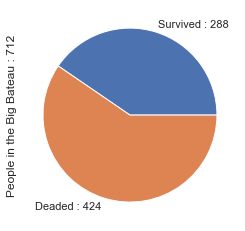

In [6]:
# Survived
a = train_df['Survived'].value_counts()
b = pd.Series({'Survived : %s'%a[1] : a[1], 'Deaded : %s'%a[0] : a[0]})
b.plot(kind='pie', label='People in the Big Bateau : %s'%(a[0] + a[1]), subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025DDC1B1488>],
      dtype=object)

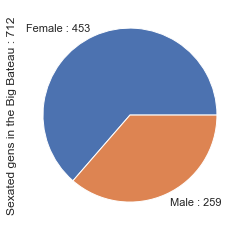

In [7]:
a = train_df['Sex'].value_counts()
b = pd.Series({'Female : %s'%a[1] : a[1], 'Male : %s'%a[0] : a[0]})
b.plot(kind='pie', label='Sexated gens in the Big Bateau : %s'%(a[0] + a[1]), subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025DDC212848>],
      dtype=object)

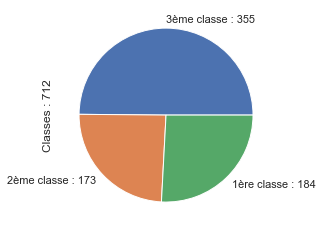

In [8]:
a = train_df['Pclass'].value_counts()
b = pd.Series({'3ème classe : %s'%a[3] : a[3], '2ème classe : %s'%a[2] : a[2], '1ère classe : %s'%a[1] : a[1]})
b.plot(kind='pie', label='Classes : %s'%(a[3] + a[1] + a[2]), subplots=True)

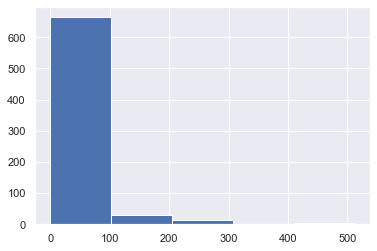

In [9]:
train_df['Fare'].hist(bins=5)

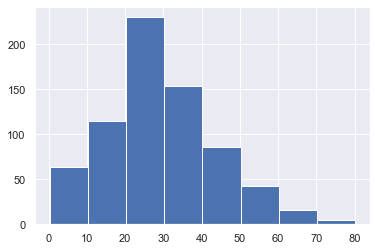

In [10]:
train_df['Age'].hist(bins=8)

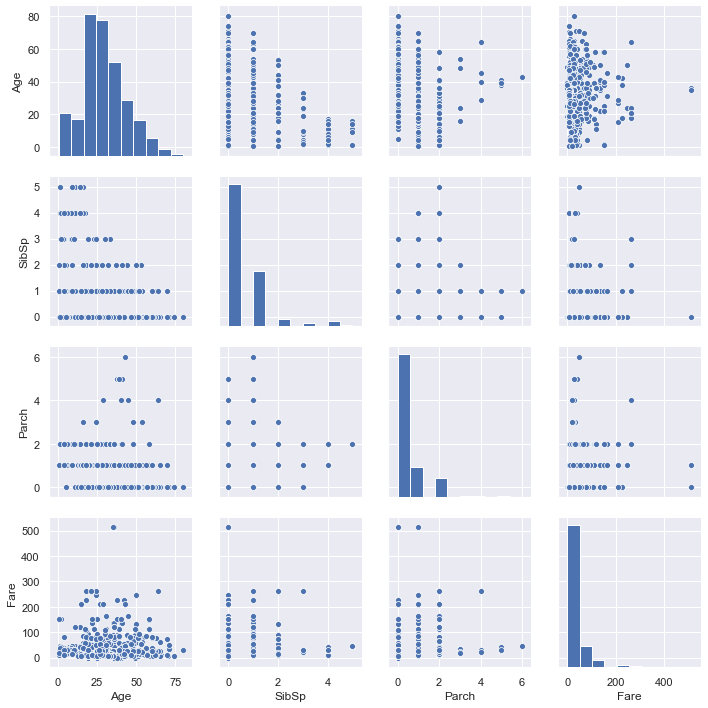

In [11]:
train_df.drop_duplicates()
X = train_df.drop('Survived', axis=1)
sns.pairplot(X[['Age', 'SibSp', 'Parch', 'Fare']])

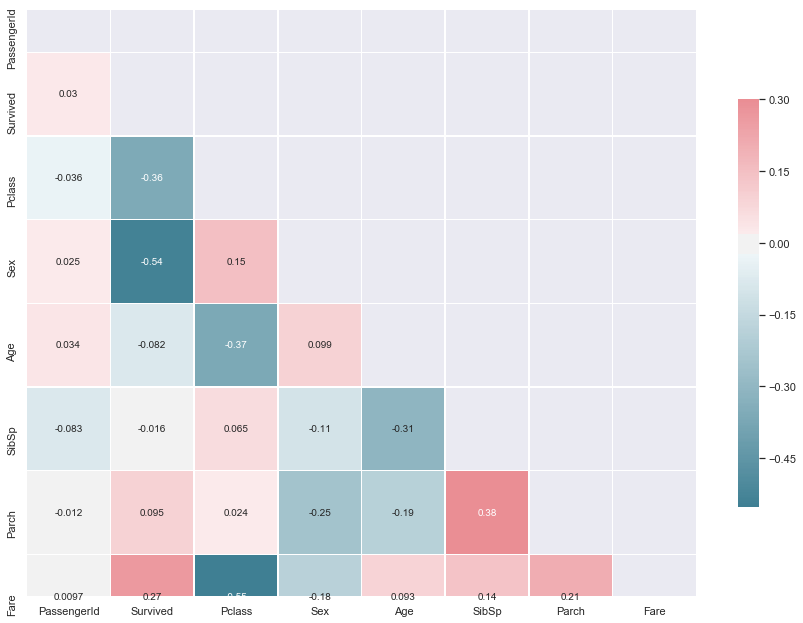

In [12]:
corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(15, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

## 3.2 Tests statistiques

### 3.2.1 Enfants

In [13]:
# créer une colonne 'binarized_age' avec une valeur à 0 si le sujet à moins de 18 ans et à 1 si elle a plus de 18 ans

train_df['binarized_age'] = train_df['Age'].copy()
for i,j in train_df['binarized_age'].iteritems():
    if j < 18:
        train_df['binarized_age'][i] = 0
    else:
        train_df['binarized_age'][i] = 1
 
scipy.stats.ttest_ind(train_df['binarized_age'], train_df.Survived) #T test

C:\Users\samue\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\samue\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Ttest_indResult(statistic=19.03479611770753, pvalue=3.839783950263928e-72)

### 3.2.2 Femmes

In [14]:
scipy.stats.ttest_ind(train_df.Sex, train_df.Survived) #T test

Ttest_indResult(statistic=8.991275387276687, pvalue=7.60096212517006e-19)

### 3.2.3 Prix du billet

In [15]:
train_df['binarize_fare'] = pd.cut(train_df['Fare'], bins=[0,60,515])
bin_fare = train_df['binarize_fare'].cat.codes 
cross = pd.crosstab(index=bin_fare,
            columns=train_df['Survived'])
g, p, dof, expctd = scipy.stats.chi2_contingency(cross)
print('G : %s, p : %s'%(g, p))

G : 47.392555530597974, p : 5.114902090793379e-11


# 4. Machine Learning

## 4.1 Regression Linéaire

### 4.1.1 : Age

In [22]:
test_df['Age'] = train_df['Age'].astype(int)
test_df['Survived'] = train_df['Survived'].astype(int)
test_df['Fare'] = train_df['Fare'].astype(int)
del test_df['Name']
del test_df['Ticket']
del test_df['Embarked']

In [23]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('Age', axis=1).copy()

X_test.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
SibSp            int64
Parch            int64
Fare           float64
Survived       float64
dtype: object

In [1]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

NameError: name 'LogisticRegression' is not defined